In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [75]:
DataSet = pd.read_csv('/Users/Daniel/Downloads/Trun_dat.csv')
DataSet.columns

Index([u'Unnamed: 0', u'Week_date', u'State', u'City', u'Labor'], dtype='object')

In [76]:
del DataSet['Unnamed: 0']

In [77]:
Trun_dat = DataSet

In [227]:
per_state = Trun_dat.pivot_table('Labor',index='Week_date',columns='State')

In [210]:
As_Whole = per_state.sum(axis=1)
per_state["USA"] = As_Whole

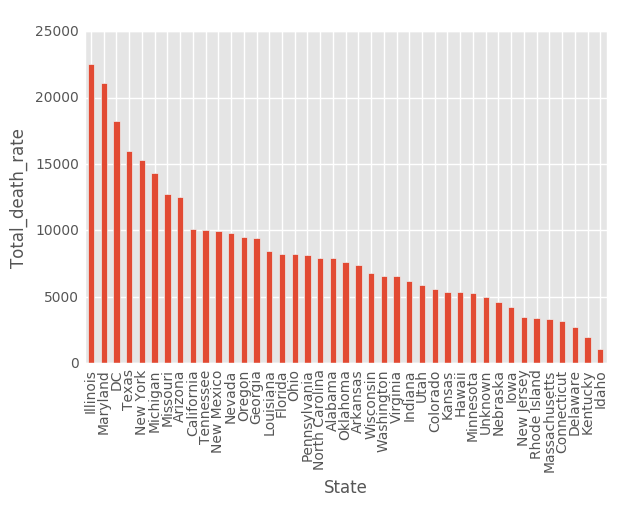

In [93]:
plt.style.use('ggplot')
death_by_state = np.sum(per_state, axis=0)
For_graph =  death_by_state.sort_values(ascending=False)[1:len(death_by_state)]
For_graph.plot(kind='bar',title='Death Rate by States')
plt.ylabel('Total_death_rate')
plt.show()

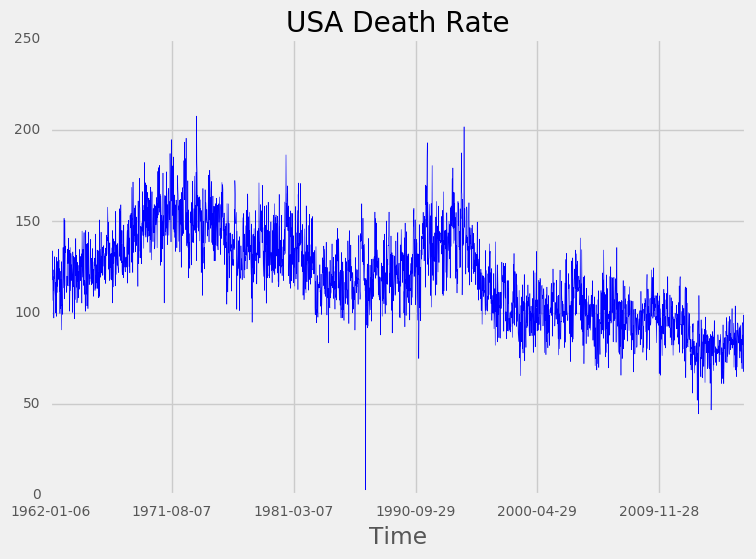

In [218]:
box_us = per_state['USA']
box_1 = per_state["Illinois"]
box_2 = per_state["Maryland"].values
box_3 = per_state["DC"].values
box_4 = per_state["Texas"].values
box_5 = per_state["New York"].values

box_us.plot(kind='line', linewidth=0.4, color='b')
plt.xlabel("Time")
plt.title("USA Death Rate")
plt.show()

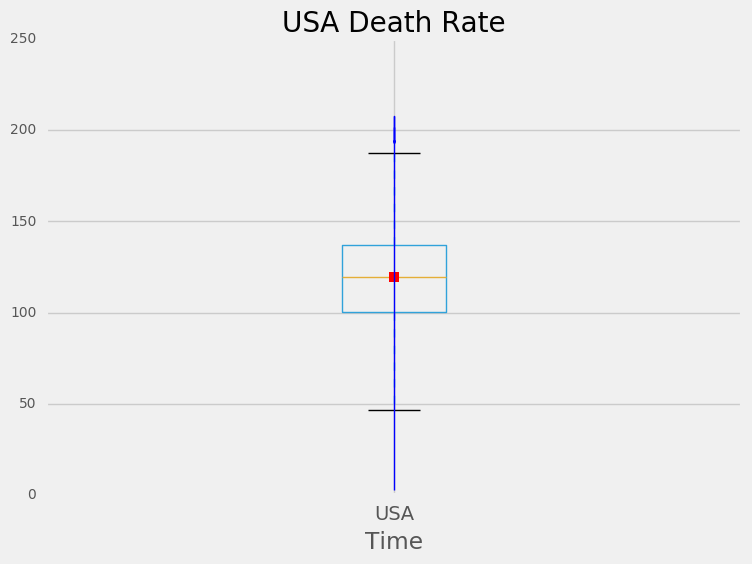

In [222]:
box_usa = pd.DataFrame(box_us)
box_usa.boxplot(showmeans=True)
plt.xlabel("Time")
plt.title("USA Death Rate")
plt.show()

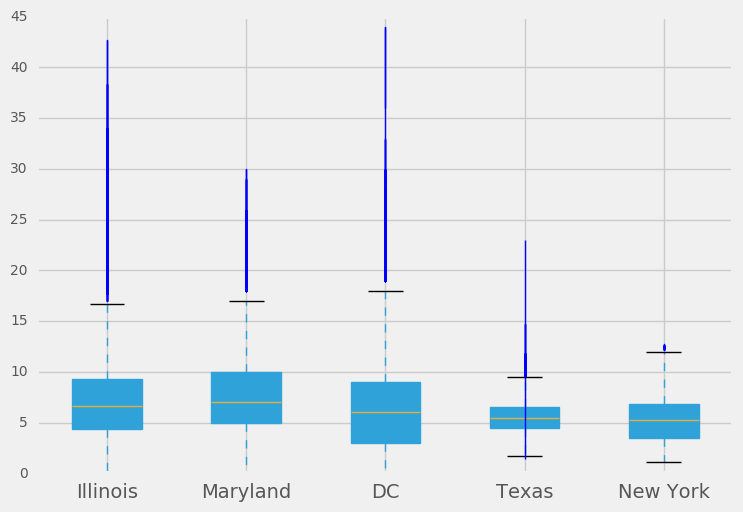

In [181]:
plt.style.use('fivethirtyeight')
bp = per_state.boxplot(column=["Illinois","Maryland","DC","Texas","New York"], patch_artist=True)
plt.show()

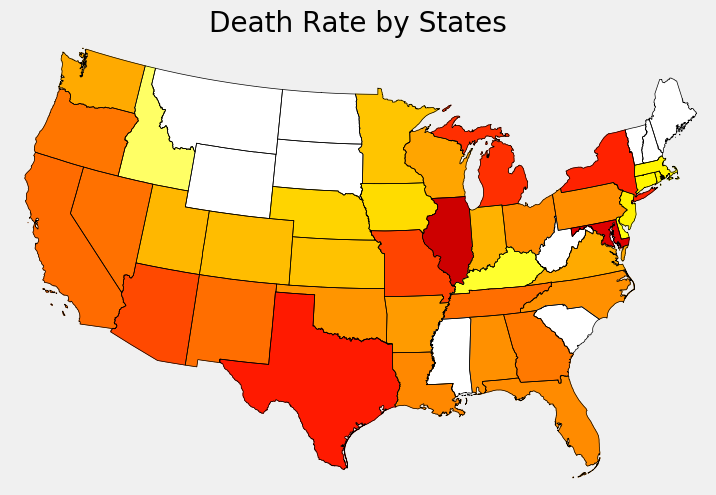

In [269]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw state boundaries.
# data from U.S Census Bureau
# http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('/Users/daniel/Shp/st99_d00/st99_d00','states',drawbounds=True)
# population density by state from
# http://en.wikipedia.org/wiki/List_of_U.S._states_by_population_density

For_map = per_state.sum(axis=0).round(2).to_dict()
popdensity = For_map
For_map['Alaska'] = 0
For_map['Montana'] = 0
For_map['North Dakota'] = 0
For_map['South Dakota'] = 0
For_map['Maine'] = 0
For_map['New Hampshire'] = 0
For_map['Vermont'] = 0
For_map['Wyoming'] = 0
For_map['West Virginia'] = 0
For_map['South Carolina'] = 0
For_map['Mississippi'] = 0

# choose a color for each state based on population density.
colors={}
statenames=[]
cmap = plt.cm.hot # use 'hot' colormap
vmin = 0; vmax = 45000 # set range.
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico']:
        pop = popdensity[statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors[statename] = cmap(1.-np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)
# cycle through state names, color each one.
ax = plt.gca() # get current axes instance
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['District of Columbia','Puerto Rico']:
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)
plt.title('Death Rate by States')
plt.show()